# Dados Brutos

In [91]:
import pandas as pd
import re
import seaborn as sns


ModuleNotFoundError: No module named 'seaborn'

In [75]:
pd.set_option('display.max_columns', None)

def extract_text_between_quotes(string):
    pattern = r"'(.*?)'"
    matches = re.findall(pattern, string)
    return matches

In [2]:
dados = pd.read_csv('State_of_data_2022.csv')

In [3]:
dados.head(3)

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_f ', 'aspectos_prejudicados')","('P1_g ', 'vive_no_brasil')","('P1_i ', 'Estado onde mora')",...,"('P8_d_2 ', 'Coletando e limpando os dados que uso para análise e modelagem.')","('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')","('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_d_7 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')","('P8_d_8 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')","('P8_d_9 ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_10 ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')"
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Perguntas possíveis:

Dados Gerais
- idade
- gênero
- ensino / formação acadêmica

Carreira
- modo de trabalho (remoto, presencial, híbrido)

Satisfação (opcional)
- satisfação / insatisfação
- motivos da insatisfação (gráfico comparativo barras)

Densidade geográfica
- Densidade de profissionais por estado
- Densidade de profissionais por gênero
- Densidade de profissionais por raça
- Densidade de profissionais pcd

Salário
- geral
- por cargo
- por tempo de carreira
- por gênero
- pcd
- por raça

Fontes de dados utilizados no trabalho

Tecnologias utilizadas
- linguagens no geral
- 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?' -> P4_e
- P4_g -> opções de cloud
- na área de ciência, engenharia e analista (tecnologias por nicho)

- procurar insights com a parte de ciência de dados - P8


obs: sobre os NaN, considerar apenas as pessoas que responderam

# Explicação do DataSet

~ explicação do kaggle

# Filtrando dados

In [4]:
# Removendo o ID
dados = dados.drop("('P0', 'id')", axis = 1)

In [5]:
# Separando por partes
parte_1 = dados.filter(like = 'P1', axis = 1)
parte_2 = dados.filter(like = 'P2', axis = 1)
parte_3 = dados.filter(like = 'P3', axis = 1)
parte_4 = dados.filter(like = 'P4', axis = 1)
parte_5 = dados.filter(like = 'P5', axis = 1)
parte_6 = dados.filter(like = 'P6', axis = 1)
parte_7 = dados.filter(like = 'P7', axis = 1)
parte_8 = dados.filter(like = 'P8', axis = 1)

In [ ]:
for i in parte_4.columns:
    parte_4.rename(columns={i:extract_text_between_quotes(i)[0]},inplace=True)

parte_4.columns

In [52]:
#Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?
df_P4_e = parte_4.filter(like='P4_e ',axis=1)
df_P4_e['contador'] = 1
df_P4_e = df_P4_e.groupby('P4_e ',as_index=False).agg({'contador':'sum'}).sort_values(by='contador',ascending=False)

df_P4_e

C:\Users\logonrmlocal\AppData\Local\Temp\ipykernel_3260\3239486589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_P4_e['contador'] = 1


,P4_e,contador
11,SQL,1245
8,Python,1136
6,Não utiliza programação,325
9,R,113
13,Visual Basic/VBA,56
12,Scala,26
3,JavaScript,22
10,SAS/Stata,19
1,C/C++/C#,13
2,Java,12


In [53]:
#Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?'
df_P4_a = parte_4.filter(like='P4_a ',axis=1)
df_P4_a['contador'] = 1
df_P4_a = df_P4_a.groupby('P4_a ',as_index=False).agg({'contador':'sum'}).sort_values(by='contador',ascending=False)

df_P4_a['percentual'] = (df_P4_a['contador'] / df_P4_a['contador'].sum()) * 100


df_P4_a


C:\Users\logonrmlocal\AppData\Local\Temp\ipykernel_3260\3879918728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_P4_a['contador'] = 1


,P4_a,contador,percentual
0,*Análise de Dados/BI:* Extrai e cruza dados un...,1326,44.751941
2,*Engenharia de Dados:* Modela soluções de arqu...,675,22.780965
1,*Ciência de Dados/Machine Learning: *Desenha e...,629,21.228485
3,Não atuo em nenhuma das frentes citadas.,333,11.238610


Matplotlib is building the font cache; this may take a moment.


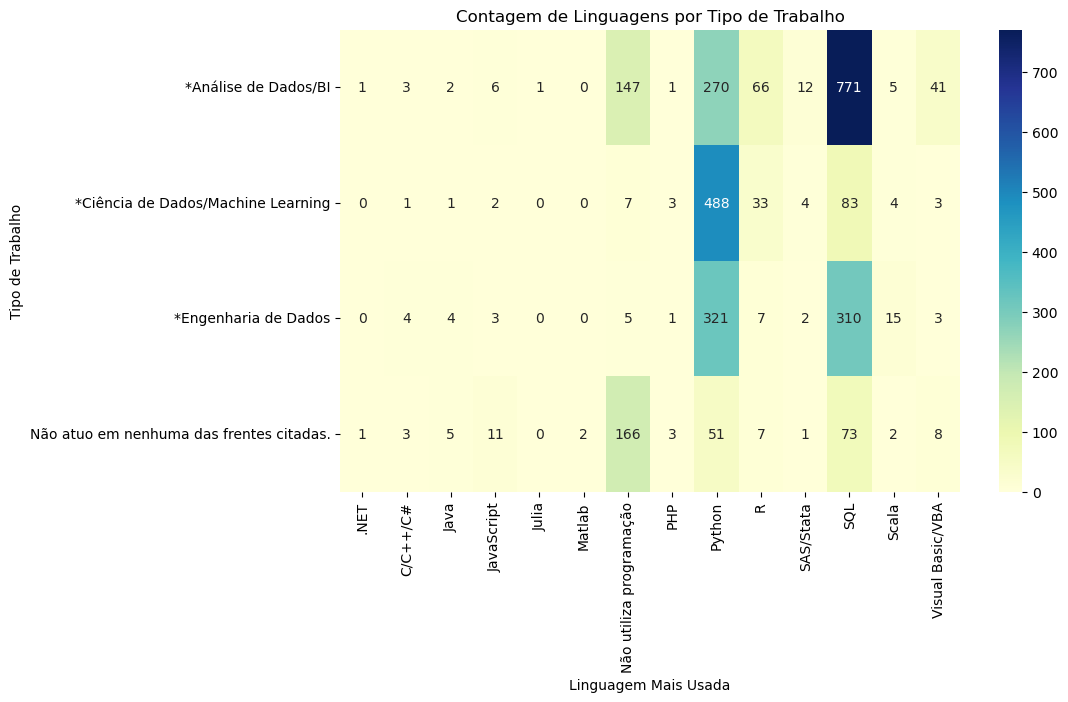

In [92]:
df_P4_e_pivot = parte_4[['P4_a ','P4_e ']]
df_P4_e_pivot = df_P4_e_agg.dropna()
df_P4_e_pivot['P4_a '] = parte_4['P4_a '].str.split(':',expand=True)[0]
df_P4_e_pivot = df_P4_e_pivot.pivot_table(index='P4_a ',columns='P4_e ',aggfunc='size', fill_value=0)
df_P4_e_pivot


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df_P4_e_pivot, cmap='YlGnBu', annot=True, fmt='d')  # cmap define a paleta de cores
plt.title('Contagem de Linguagens por Tipo de Trabalho')
plt.xlabel('Linguagem Mais Usada')
plt.ylabel('Tipo de Trabalho')
plt.show()